In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv('F:/0.1 ExcelR Institute/Data Science/Assignments/Multi Linear Regression/50_Startups.csv')
# data1

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data1.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [5]:
import seaborn as sns

In [6]:
# sns.pairplot(data1)

In [7]:
data1.corr()
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
data=data1[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

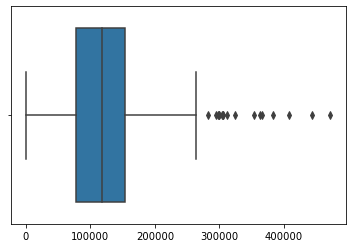

In [9]:
# sns.boxplot(data['R&D Spend'])

# sns.boxplot(data['Administration'])

# sns.boxplot(data['Marketing Spend'])

# sns.boxplot(data['Profit'])

sns.boxplot(data)

In [10]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
state=pd.get_dummies(data1['State'],drop_first=True)

In [12]:
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [13]:
data1=data1.drop('State',axis=1)
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [14]:
data1=pd.concat([data1,state],axis=1)

In [15]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [16]:
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida',
       'New York'],
      dtype='object')

In [17]:
X=data1[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida',
       'New York']]
Y=data1[['Profit']]

In [18]:
X.head()
# Y.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor= LinearRegression()

In [23]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [24]:
y_pred=regressor.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
score=r2_score(Y_test,y_pred)

In [27]:
score

0.9347068473282423